In [1]:
import pandas as pd
pd.set_option('display.max_columns',50)

import numpy as np
import os
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

## Summarise the dataset

In [2]:
arabica_df=pd.read_csv('/Users/peace/standalone_projects/experian_coffee/data/arabica_final.csv')

In [3]:
arabica_df=arabica_df.rename(columns={'Country.of.Origin':'Country_of_Origin','Farm.Name':'Farm_Name','Lot.Number':'Lot_Number','ICO.Number':'ICO_Number','Number.of.Bags':'Number_of_Bags','Bag.Weight':'Bag_Weight','In.Country.Partner':'In_Country_Partner','Harvest.Year':'Harvest_Year','Grading.Date':'Grading_Date','Processing.Method':'Processing_Method','Clean.Cup':'Clean_Cup','Total.Cup.Points':'Total_Cup_Points','Category.One.Defects':'Category_One_Defects','Category.Two.Defects':'Category_Two_Defects','Certification.Body':'Certification_Body','Certification.Address':'Certification_Address','Certification.Contact':'Certification_Contact','Cupper.Points':'Cupper_Points'})

In [4]:
arabica_df.describe(include='object')

,Species,Owner,Country_of_Origin,Farm_Name,Lot_Number,Mill,ICO_Number,Company,Region,Producer,Bag_Weight,In_Country_Partner,Harvest_Year,Grading_Date,Owner.1,Variety,Processing_Method,Color,Expiration,Certification_Body,Certification_Address,Certification_Contact
count,1439,1432,1438,1062,398,1112,1257,1230,1381,1207,1439,1439,1392,1439,1432,1238,1287,1222,1439,1439,1439,1439
unique,1,339,36,605,317,496,916,300,372,734,61,31,50,632,347,32,5,9,631,30,46,43
top,Arabica,juan luis alvarado romero,mexico,various,1,beneficio ixchel,0,"unex guatemala, s.a.",huila,la plata,1 kg,Specialty Coffee Association,2012,"July 11th, 2012",Juan Luis Alvarado Romero,Caturra,Washed / Wet,Green,"December 26th, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660
freq,1439,155,240,75,30,92,67,87,121,39,329,298,352,25,155,273,900,938,25,298,293,295


In [5]:
arabica_df.describe()

,Altitude,Number_of_Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,Total_Cup_Points,Moisture,Category_One_Defects,Quakers,Category_Two_Defects
count,1212.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1311.000000,1439.000000,1439.000000,1439.000000,1438.000000,1439.000000
mean,1741.480408,161.503127,7.571348,7.528735,7.403822,7.540813,7.525719,7.523864,9.840792,9.841939,9.908631,7.497864,82.187074,0.090533,0.394719,0.263561,3.538568
std,8292.811946,135.895428,0.372724,0.394388,0.397608,0.375281,0.352008,0.397354,0.553736,0.748355,0.517991,0.474610,3.456869,0.046511,1.755143,1.077740,5.180310
min,-900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1100.000000,16.000000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.250000,0.100000,0.000000,0.000000,0.000000
50%,1344.000000,200.000000,7.580000,7.580000,7.420000,7.580000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.580000,0.110000,0.000000,0.000000,2.000000
75%,1600.000000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000
max,190164.000000,1280.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,10.000000,90.580000,0.280000,31.000000,18.000000,55.000000


* The minimum values of some cols (Aroma, Flavor, Aftertaste...) are zero, which is quite strange (del the row)

In [6]:
# Delete the only row that has all zero gradings
error_index=arabica_df[arabica_df['Flavor']==0].index.values[0]
arabica_df=arabica_df.drop(error_index)

## Check Missing Values

In [7]:
total=arabica_df.isnull().sum().sort_values(ascending=False)
percentage=(total/arabica_df.isnull().count()).sort_values(ascending=False)

In [8]:
percentage.head(17)

Lot_Number           0.723922
Farm_Name            0.262170
Mill                 0.227399
Producer             0.161335
Altitude             0.157858
Color                0.150904
Company              0.145341
Variety              0.139777
ICO_Number           0.126565
Processing_Method    0.105007
Cupper_Points        0.089013
Region               0.040334
Harvest_Year         0.032684
Owner.1              0.004868
Owner                0.004868
Quakers              0.000695
Country_of_Origin    0.000695
dtype: float64

### Impute Missing Values

#### Quakers
One missing value
* Only 1/54 coffee beans from the same owner have one Quaker

In [9]:
arabica_df['Quakers']=arabica_df['Quakers'].fillna(0)

#### Cupper Points
The newly scrapped data dosen't have cupper_points col
* Fill nan with the median value from the same In_Country_Partner
* Fill the rest nan with the median value of the dataset

In [10]:
arabica_df['Cupper_Points']=arabica_df.groupby('In_Country_Partner').Cupper_Points.apply(lambda s: s.fillna(s.median()))
arabica_df['Cupper_Points']=arabica_df['Cupper_Points'].fillna(arabica_df['Cupper_Points'].median())

## Clustering
* Delete Altitude col (>15% missing values) and Number of bags col (irrelavent)
* K-means clustering, K-means clustering with cosine similarities, DBSCAN

In [11]:
# Prepare the data
X = arabica_df.select_dtypes(exclude=['object'])
X.drop(['Altitude','Number_of_Bags'],1,inplace=True)
x_columns=X.columns
X.isnull().sum()

Aroma                   0
Flavor                  0
Aftertaste              0
Acidity                 0
Body                    0
Balance                 0
Uniformity              0
Clean_Cup               0
Sweetness               0
Cupper_Points           0
Total_Cup_Points        0
Moisture                0
Category_One_Defects    0
Quakers                 0
Category_Two_Defects    0
dtype: int64

### K-Means with euclidean distance

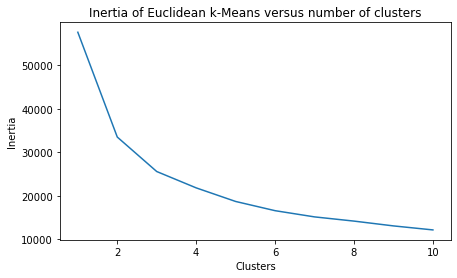

In [12]:
# Elbow method to determine the number of clusters 
from sklearn.cluster import KMeans

clusters=[]

for i in range(1,11):
    km=KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)

fig,ax=plt.subplots(figsize=(7,4))
sns.lineplot(x=list(range(1,11)),y=clusters,ax=ax)
ax.set_title('Inertia of Euclidean k-Means versus number of clusters')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

plt.show()

As can be seen from the graph, 3 is the last bend.

### K-means with cosine similarities

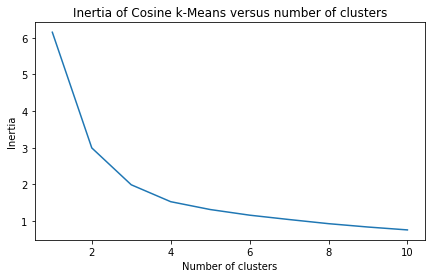

In [14]:
from sklearn import preprocessing

clusters=[]

normalized_vectors=preprocessing.normalize(X)
for i in range(1,11):
    km=KMeans(n_clusters=i).fit(normalized_vectors)
    clusters.append(km.inertia_)

fig,ax=plt.subplots(figsize=(7,4))
sns.lineplot(np.arange(1,11),clusters)


plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.title("Inertia of Cosine k-Means versus number of clusters")

plt.show()

### DBSCAN (based on the density of data points)
* minPts: at least the number of features in your data
* eps: 

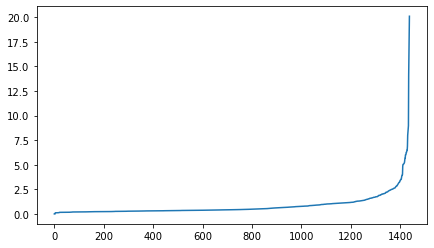

In [15]:
# Find the optimum eps at the last bend in the graph
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
fig,ax=plt.subplots(figsize=(7,4))
plt.plot(distances)

Find the eps=3

### Evaluation (Sihouette Score)
(b-a)/max(a,b)
* a- mean intra-cluster distance
* b- mean nearest-cluster distance

In [16]:
from sklearn.metrics import silhouette_score

# prepare models
kmeans=KMeans(n_clusters=3).fit(X)

normalized_vectors=preprocessing.normalize(X)
normalized_kmeans=KMeans(n_clusters=3).fit(normalized_vectors)

min_samples=X.shape[1]+1
dbscan=DBSCAN(eps=3,min_samples=min_samples).fit(X)

print('kmeans: {}'.format(silhouette_score(X, kmeans.labels_, 
                                           metric='euclidean')))
print('Cosine kmeans:{}'.format(silhouette_score(normalized_vectors,
                                          normalized_kmeans.labels_,
                                          metric='cosine')))
print('DBSCAN: {}'.format(silhouette_score(X, dbscan.labels_, 
                                           metric='cosine')))


kmeans: 0.47903527156227416
Cosine kmeans:0.7617933045417482
DBSCAN: 0.8259323420593372


As can be seen above, DBSCAN > Cosine > kmeans. Cosine similarity works better due to the high dimensionality of the data

### Visualizing Clusters (PCA & t_SNE)
Use dimensionality reduction to visualise the data in 2d and 3d 

In [17]:
from sklearn.decomposition import PCA
def pca_prepare(n_components,df,labels):
    pca=PCA(n_components=n_components)
    pca_data=pca.fit_transform(df)
    pca_data=np.vstack([pca_data.T,labels]).T
    pca_df=pd.DataFrame(pca_data,columns=['x','y','labels'])
    return pca_df

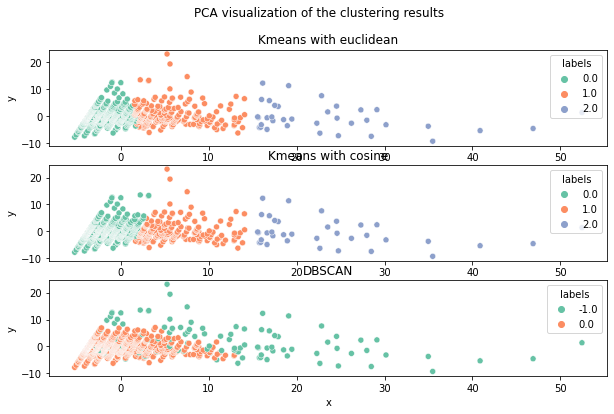

In [18]:
pca_df_kmeans=pca_prepare(2,X,kmeans.labels_)
pca_df_cosine_kmeans=pca_prepare(2,X,normalized_kmeans.labels_)
pca_df_DBSCAN=pca_prepare(2,X,dbscan.labels_)

fig,axes=plt.subplots(3,figsize=(10,6))
sns.scatterplot(ax=axes[0],x=pca_df_kmeans.x, y=pca_df_kmeans.y,hue=pca_df_kmeans.labels, palette='Set2').set(title='Kmeans with euclidean')
sns.scatterplot(ax=axes[1],x=pca_df_cosine_kmeans.x, y=pca_df_cosine_kmeans.y,hue=pca_df_cosine_kmeans.labels, palette='Set2').set(title='Kmeans with cosine')
sns.scatterplot(ax=axes[2],x=pca_df_DBSCAN.x, y=pca_df_DBSCAN.y,hue=pca_df_DBSCAN.labels, palette='Set2').set(title='DBSCAN')

fig.suptitle('PCA visualization of the clustering results')
fig.show()

Only one cluster is identified with DBSCAN methods; -1 label is the label for noises

In [19]:
from sklearn.manifold import TSNE
def tsne_prepare(n_components,df):
    tsne=TSNE(n_components=n_components)
    tsne_data=tsne.fit_transform(df)
    return tsne_data

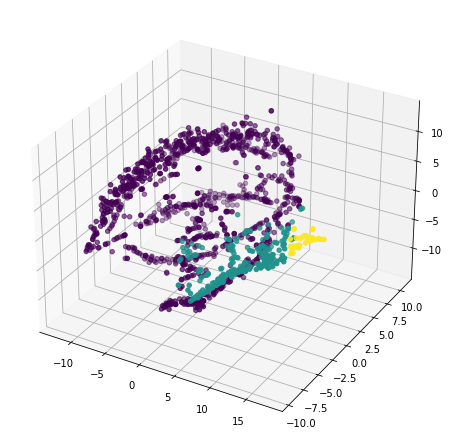

In [20]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
tsne_data=tsne_prepare(3, X)

tsne_data_kmeans=np.vstack([tsne_data.T,kmeans.labels_]).T
tsne_3d_df_kmeans=pd.DataFrame(tsne_data_kmeans,columns=['x','y','z','labels'])

tsne_data_cosine_kmeans=np.vstack([tsne_data.T,normalized_kmeans.labels_]).T
tsne_3d_df_cosine_kmeans=pd.DataFrame(tsne_data_cosine_kmeans,columns=['x','y','z','labels'])

tsne_data_dbscan=np.vstack([tsne_data.T,dbscan.labels_]).T
tsne_3d_df_dbscan=pd.DataFrame(tsne_data_dbscan,columns=['x','y','z','labels'])

fig=plt.figure(figsize=(6,6))
ax=Axes3D(fig)

sc=ax.scatter(tsne_3d_df_cosine_kmeans.x, tsne_3d_df_cosine_kmeans.y,tsne_3d_df_cosine_kmeans.z,c=tsne_3d_df_cosine_kmeans.labels,marker='o')

### Interpreting Clusters
Find out which features are more significant in the clustering process

In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
df_scaled=pd.DataFrame(scaler.fit_transform(normalized_vectors),columns=x_columns)

df_scaled['kmeans_cosine']=normalized_kmeans.labels_

df_mean=(df_scaled.groupby('kmeans_cosine').mean())
df_mean

,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,Total_Cup_Points,Moisture,Category_One_Defects,Quakers,Category_Two_Defects
kmeans_cosine,,,,,,,,,,,,,,,
0,0.485124,0.438185,0.445239,0.431386,0.474049,0.421102,0.713071,0.892936,0.823346,0.481537,0.989971,0.316232,0.007028,0.011623,0.033041
1,0.476826,0.416735,0.415385,0.428772,0.472090,0.400863,0.708346,0.882452,0.822659,0.466354,0.957719,0.362298,0.029130,0.031712,0.177347
2,0.436332,0.298967,0.302113,0.381278,0.440830,0.283588,0.661818,0.751988,0.791470,0.386138,0.712863,0.409711,0.122556,0.001456,0.507866


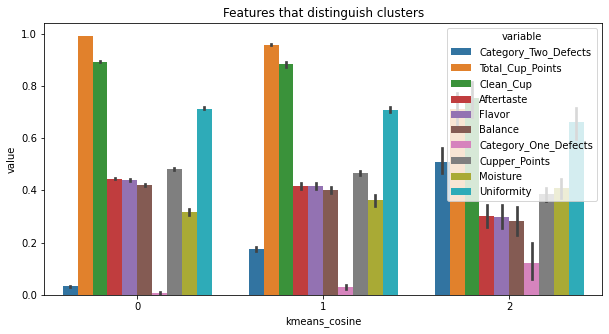

In [23]:
results = pd.DataFrame(columns=['Variable', 'Var'])
for column in df_mean.columns[0:]:
    results.loc[len(results), :] = [column, np.var(df_mean[column])]
selected_columns = list(results.sort_values('Var', ascending=False).head(10).Variable.values) + ['kmeans_cosine']
tidy = df_scaled[selected_columns].melt(id_vars='kmeans_cosine')
plt.figure(figsize=(10,5))
sns.barplot(x='kmeans_cosine', y='value', hue='variable', data=tidy)
plt.title('Features that distinguish clusters')
plt.show()

### Random Forest Feature Selection
Use classification to understand the importance of each feature (More work could be done here for validation and finding the most suitable model.)

<AxesSubplot:xlabel='group', ylabel='Sweetness'>

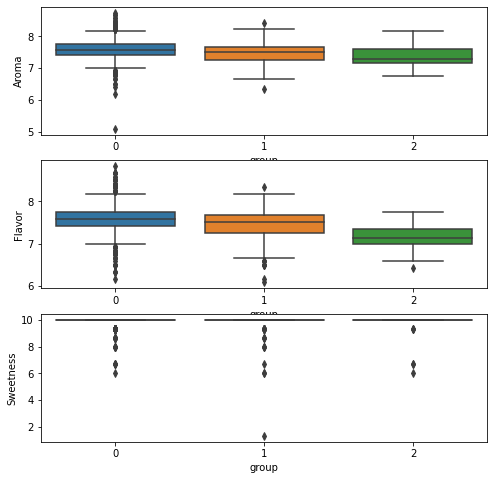

In [33]:
# Box plot to identify the trend
arabica_df['group']=normalized_kmeans.labels_
fig,axes=plt.subplots(3,figsize=(8,8))
sns.boxplot(x='group',y='Aroma',data=arabica_df,ax=axes[0])
sns.boxplot(x='group',y='Flavor',data=arabica_df,ax=axes[1])
sns.boxplot(x='group',y='Sweetness',data=arabica_df,ax=axes[2])

<AxesSubplot:>

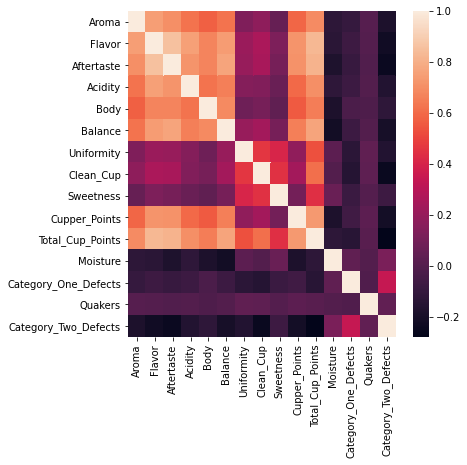

In [37]:
# Get Correlation Matric (Heatmap)
corrmat=X.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corrmat)

Aroma, flavor, aftertaste, acidity, body and balance are positively correlated; uniformity, clean_cup and sweetness are mostly 10/10. Total_Cup_Points are negatively correlated with category_one_defects and category_two defects as expected.

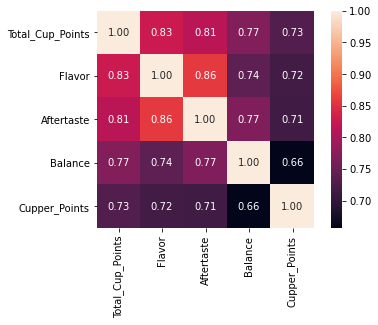

In [46]:
k=5
cols=corrmat.nlargest(k,'Total_Cup_Points')['Total_Cup_Points'].index
cm=np.corrcoef(X[cols].values.T)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',yticklabels=cols.values,xticklabels=cols.values)

Flavor and aftertaste are the most positively correlated features to Total_Cup_Points

In [68]:
# Choosing the ideal hyper-parameters (Random SearchCV)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

y=normalized_kmeans.labels_

n_estimators = [int(x) for x in np.linspace(start = 80, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_forest=RandomForestClassifier()
random_forest_search=RandomizedSearchCV(estimator=random_forest,param_distributions=random_grid,n_iter=100,cv=5,verbose=2,random_state=42,n_jobs=-1)
random_forest_search.fit(X,y)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [80, 182, 284, 386, 488,
                                                         591, 693, 795, 897,
                                                         1000]},
                   random_state=42, verbose=2)

In [74]:
# Finding the best params
random_forest_search.best_params_

{'n_estimators': 693,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [70]:
# Evaluate random search
from sklearn.model_selection import KFold, cross_val_score
n_folds=5
def cross_v(model):
    kf=KFold(n_folds,shuffle=True,random_state=42).get_n_splits(X)
    score=cross_val_score(model,X,y,cv=kf)
    return score.mean()
    
base_model=RandomForestClassifier(random_state=42,n_estimators=100)
rf=random_forest_search.best_estimator_

base_score=cross_v(base_model)
rf_score=cross_v(rf)

print(f'Base Model Score: {base_score}')
print(f'Tuned Model Score: {rf_score}')

Base Model Score: 0.9665989159891598
Tuned Model Score: 0.9714648664343788


In [73]:
# Choosing the ideal hyper-parameters (GridSearchCV)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [False],
    'max_depth': [60, 70, 80, 90],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt'],
    'min_samples_split': [3, 5, 7,9],
    'n_estimators': [400, 600,800, 1000]
}

random_forest_1=RandomForestClassifier()
grid_search=GridSearchCV(estimator=random_forest_1,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X,y)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [60, 70, 80, 90],
                         'max_features': ['sqrt'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [3, 5, 7, 9],
                         'n_estimators': [400, 600, 800, 1000]},
             verbose=2)

In [75]:
# Finding the best params
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 60,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 7,
 'n_estimators': 400}

In [79]:
# Evaluate grid search
rf_grid=grid_search.best_estimator_

rf_score=cross_v(rf)
rf_grid_score=cross_v(rf_grid)

print(f'Random Tuned Score: {rf_score}')
print(f'Grid Tuned Score: {rf_grid_score}')

Random Tuned Score: 0.9665819783197833
Grid Tuned Score: 0.96937185443283


It seems we have about maxed out performance.

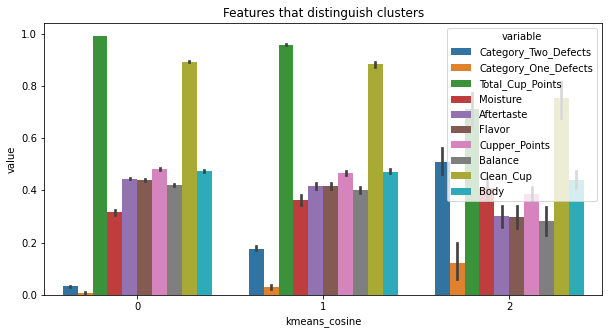

In [83]:
# Feature Importance Visualization

data=np.array([rf.feature_importances_,x_columns]).T
columns=list(pd.DataFrame(data,columns=['Importance','Feature']).sort_values('Importance',ascending=False).head(10).Feature.values)
tidy=df_scaled[columns+['kmeans_cosine']].melt(id_vars='kmeans_cosine')
plt.figure(figsize=(10,5))
sns.barplot(x='kmeans_cosine',y='value',hue='variable',data=tidy)
plt.title('Features that distinguish clusters')
plt.show()

* Label 2 coffee beans seem to have the highest number of defects and the lowest grading in terms of aftertaste, flavor, and aroma, which could possibly suit James who prefers coffee the american way (if low gradings in flavor and aroma mean less flavor and aroma).
* In regards to the sweetness, coffee beans from all three cluster groups have very high gradings.

To find the best coffee bags that would satisfy everyone in the team, I'd look into the cluster group 1 and 2, and find the sweetest coffee beans with the least defects made in Brazil, preferrably from South of Minas. 
As the only coffee beans belong to group 2 and was processed in Brazil has 55 category two defects, I choose to mainly consider the ones from group 1.

In [26]:
final_group=arabica_df[(arabica_df['Group']==1)&(arabica_df['Country_of_Origin']=='brazil')&(arabica_df['Sweetness']==10)&(arabica_df['Category_One_Defects']==0)]
final_brazil=final_group.sort_values(['Flavor','Aroma','Category_Two_Defects'],ascending=['True','True','True']).head(3)
final_south_of_minas=final_group[final_group['Region']=='south of minas'].sort_values(['Flavor','Aroma','Category_Two_Defects'],ascending=['True','True','True']).head(3)

The below coffee beans could potentially be the ones that help Marcio achieve his ambitious goals! The first 3 are the ones that have the lowest grading of aroma, flavor and the lowest number of category two defects, and the last three are the ones from south of Minas with similar gradings.

In [27]:
final_brazil

,Species,Owner,Country_of_Origin,Farm_Name,Lot_Number,Mill,ICO_Number,Company,Altitude,Region,Producer,Number_of_Bags,Bag_Weight,In_Country_Partner,Harvest_Year,Grading_Date,Owner.1,Variety,Processing_Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,Total_Cup_Points,Moisture,Category_One_Defects,Quakers,Color,Category_Two_Defects,Expiration,Certification_Body,Certification_Address,Certification_Contact,Group
1401,Arabica,volcafe ltda. - brasil,brazil,NaN,2017/2018-Lot01,copag,NaN,volcafe ltda.,NaN,monte carmelo,NaN,440,59 kg,Brazil Specialty Coffee Association,2017 / 2018,"October 27th, 2017",Volcafe Ltda. - Brasil,NaN,Natural / Dry,7.17,7.00,6.83,7.50,7.17,7.00,8.00,8.0,10.0,7.00,75.67,0.11,0,1.0,Green,6,"October 27th, 2018",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,1
1126,Arabica,bourbon specialty coffees,brazil,cachoeira da grama farm,43104350 - K25247,dry mill,002/4542/0044,bourbon specialty coffees,NaN,grama valley,gabriel carvalho dias,300,59 kg,Brazil Specialty Coffee Association,NaN,"January 16th, 2018",BOURBON SPECIALTY COFFEES,Bourbon,Pulped natural / honey,7.25,7.25,7.17,7.50,7.33,7.17,10.00,10.0,10.0,7.33,81.00,0.11,0,6.0,Green,9,"January 16th, 2019",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,1
1188,Arabica,bourbon specialty coffees,brazil,leticia farm,91,internacional armazens gerais,NaN,bourbon specialty coffees,NaN,monte carmelo,max kend takiuti e outros,94,60 kg,Brazil Specialty Coffee Association,2016,"March 11th, 2016",BOURBON SPECIALTY COFFEES,NaN,NaN,7.33,7.25,7.33,7.08,7.58,7.25,9.33,10.0,10.0,7.42,80.58,0.11,0,0.0,Green,7,"March 11th, 2017",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,1


In [28]:
final_south_of_minas

,Species,Owner,Country_of_Origin,Farm_Name,Lot_Number,Mill,ICO_Number,Company,Altitude,Region,Producer,Number_of_Bags,Bag_Weight,In_Country_Partner,Harvest_Year,Grading_Date,Owner.1,Variety,Processing_Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean_Cup,Sweetness,Cupper_Points,Total_Cup_Points,Moisture,Category_One_Defects,Quakers,Color,Category_Two_Defects,Expiration,Certification_Body,Certification_Address,Certification_Contact,Group
763,Arabica,gabriel barbara,brazil,NaN,GO-669-16,copag armazéns gerais ltda.,NaN,volcafe ltda.,NaN,south of minas,NaN,198,59 kg,Brazil Specialty Coffee Association,2016,"April 19th, 2017",Gabriel Barbara,NaN,Pulped natural / honey,7.50,7.58,7.42,7.50,7.75,7.33,10.0,10.0,10.0,7.50,82.58,0.11,0,0.0,Green,7,"April 19th, 2018",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,1
865,Arabica,ipanema coffees,brazil,rio verde,NaN,ipanema comercial e exportadora sa,002/4177/0150,ipanema coffees,1.0,south of minas,ipanema agrícola sa,180,2 kg,Brazil Specialty Coffee Association,2015/2016,"October 8th, 2015",Ipanema Coffees,Yellow Bourbon,Natural / Dry,7.42,7.67,7.50,7.08,7.50,7.42,10.0,10.0,10.0,7.67,82.25,0.00,0,0.0,Green,9,"October 7th, 2016",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,1
389,Arabica,ipanema coffees,brazil,capoeirinha,007/16E,dry mill,002/1660/0105,ipanema coffees,934.0,south of minas,ipanema agricola,320,60 kg,Brazil Specialty Coffee Association,2016,"August 16th, 2016",Ipanema Coffees,Bourbon,Natural / Dry,7.58,7.67,7.67,7.75,7.58,7.83,10.0,10.0,10.0,7.83,83.92,0.11,0,2.0,Green,7,"August 16th, 2017",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,1
